# Pregunta  1

El problema XOR es un problema de clasificación donde los datos, en este caso puntos en el rectángulo $[-1,1]\times[-1,1]$ poseen etiquetas correspondientes al resultado de la función lógica XOR dadas sus coordenadas espaciales. Por ejemplo, $ XOR(-1,-1) = -1$, $XOR(-0.56, 0) = 1$, y así. 

La regla XOR por lo tanto particiona el espacio en dos clases disjuntas, los cuadrantes 1 y 3 pertenecen a la clase donde $XOR(x_1,x_2) = -1$ (pues sus signos coinciden) y los cuadrantes 2 y 4 pertenecen a la clase donde $XOR(x_1, x_2) = 1$ (pues sus signos difieren). Dicho particionamiento hace que la clasificación sea un problema no linealmente separable.

## a) Generación de data para XOR

In [1]:
import numpy as np

In [49]:
def do_XOR(n=1000,noisy_n=100,svm=False):
    rng = np.random.RandomState(0)
    X_train = rng.uniform(low=-1.0,high=1.0,size=(n,2))
    Y_train = np.logical_xor(X_train[:,0] > 0, X_train[:,1] > 0)
    Y_train = 2*Y_train-1 if svm else Y_train
    X_noisy= rng.uniform(low=-0.8,high=0.2,size=(noisy_n,2))
    Y_noisy = -1*np.logical_xor(X_noisy[:,0] > 0, X_noisy[:,1] > 0) + 1
    Y_noisy = 2*Y_noisy-1 if svm else Y_noisy
    X_train = np.vstack((X_train, X_noisy))
    Y_train = np.hstack((Y_train, Y_noisy))
    X_test = rng.uniform(low=-1.0,high=1.0,size=(n,2))
    Y_test = np.logical_xor(X_test[:,0] > 0, X_test[:,1] > 0)
    Y_test = 2*Y_test - 1 if svm else Y_test
    return X_train,Y_train,X_test,Y_test

In [50]:
X_train, Y_train, X_test, Y_test = do_XOR()

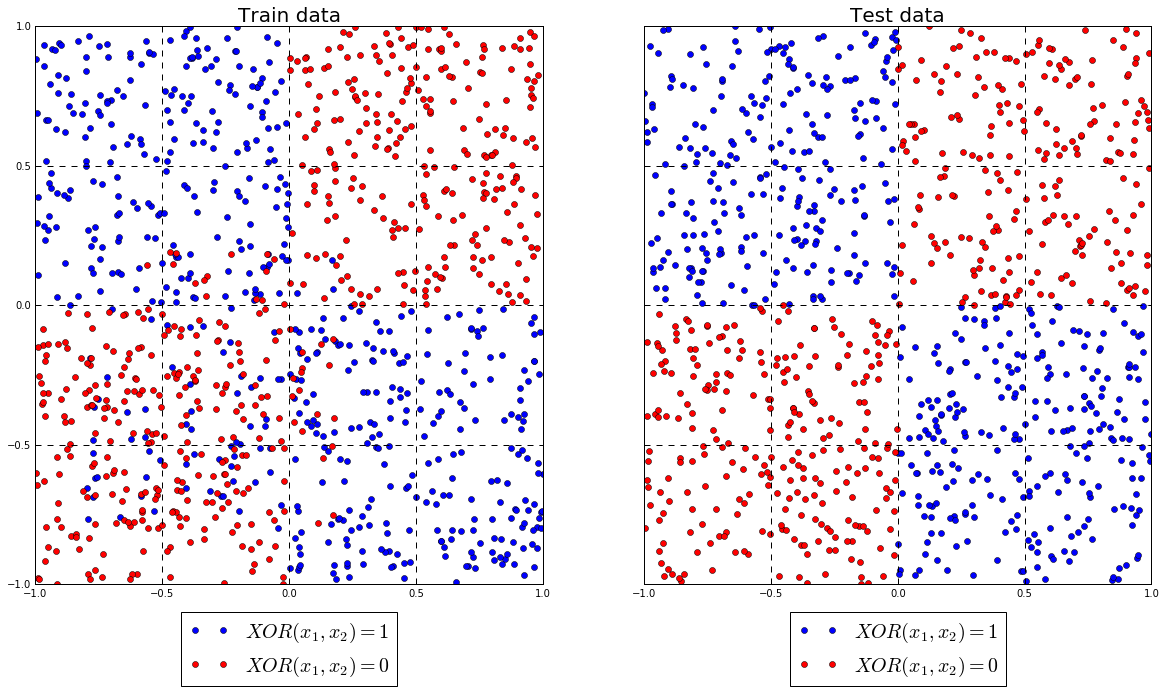

In [95]:
%matplotlib inline
import matplotlib.pyplot as plt

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(20,10))
ax1.set_title("Train data", fontsize=20)
ax1.grid(color='k', linestyle='--', linewidth=1)
class1 = Y_train == 1
class2 = Y_train == 0
ax1.plot(X_train[class1, 0], X_train[class1, 1], 'bo', label=r"$XOR(x_1, x_2) = 1$")
ax1.plot(X_train[class2, 0], X_train[class2, 1], 'ro', label=r"$XOR(x_1, x_2) = 0$")
box = ax1.get_position()
ax1.set_position([box.x0, box.y0, box.width, box.height])
plt.grid()
ax1.legend(loc='lower center', bbox_to_anchor=(0.5, -0.2), fontsize=20)

ax2.set_title("Test data", fontsize=20)
ax2.grid(color='k', linestyle='--', linewidth=1)
class1 = Y_test == 1
class2 = Y_test == 0
ax2.plot(X_test[class1, 0], X_test[class1, 1], 'bo', label=r"$XOR(x_1, x_2) = 1$")
ax2.plot(X_test[class2, 0], X_test[class2, 1], 'ro', label=r"$XOR(x_1, x_2) = 0$")
box = ax2.get_position()
ax2.set_position([box.x0, box.y0, box.width, box.height])
ax2.legend(loc='lower center', bbox_to_anchor=(0.5, -0.2), fontsize=20)
plt.show()